##Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

In [2]:
#df1 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
df1 = pd.read_csv('UP-5.csv')

## Data Analysis

### Exploratory Data Analysis

In [3]:
df1.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


Merapikan susunan kolom data, dimana variabel dependen diletakkan pada bagian paling kanan.

In [4]:
df1=df1[df1.columns[[13,0,1,2,4,5,6,7,8,9,10,11,12,3]]]
df1.head()

,DATE TIME,Formation,TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),ROP (m/hr)
0,19/06/2010 07.12.15,Seno,428,428.01,3,514.3,818,70,1915,10.4,10.401,44,0.01,33.3
1,19/06/2010 07.14.23,Seno,429,429.01,4,428.8,554,79,2383,10.4,10.403,40,0.05,39.3
2,19/06/2010 07.16.43,Seno,430,430.00,3,442.7,547,79,2499,10.4,10.405,40,0.09,26.7
3,19/06/2010 09.04.13,Seno,431,430.99,5,604.9,1259,82,1080,10.4,10.407,48,0.20,29.1
4,19/06/2010 09.05.52,Seno,432,432.00,10,782.1,1846,92,3106,10.4,10.409,58,0.23,40.8


In [5]:
df1.describe()

,TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),ROP (m/hr)
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1456.500000,1456.411924,8.744412,824.538387,2959.543246,156.351312,9213.728377,10.852662,10.872496,62.658892,21.953197,72.522935
std,594.237747,594.199795,3.591133,34.861439,581.566385,23.840552,3168.341569,0.250399,0.262644,1.605554,12.030151,32.636414
min,428.000000,428.010000,0.000000,428.800000,547.000000,70.000000,784.000000,10.400000,10.388000,40.000000,0.010000,3.100000
25%,942.250000,942.177500,7.000000,815.200000,2434.500000,146.000000,6946.500000,10.500000,10.556000,62.000000,13.095000,49.725000
50%,1456.500000,1456.425000,9.000000,823.400000,2901.000000,158.000000,9147.500000,11.000000,10.900000,63.000000,21.600000,67.200000
75%,1970.750000,1970.667500,11.000000,844.300000,3443.500000,167.000000,11404.500000,11.000000,11.080000,64.000000,30.435000,91.875000
max,2485.000000,2484.790000,22.000000,1130.500000,3966.000000,199.000000,19822.000000,11.000000,11.080000,65.000000,50.330000,203.200000


### Multi-variate Data Analysis

Melihat **interaksi antar *feature* yang ada** dengan menggunakan *heatplot*.

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_59922/2829348257.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr().abs(), annot=True, cmap='Greens').set(title='UP-5')


[Text(0.5, 1.0, 'UP-5')]

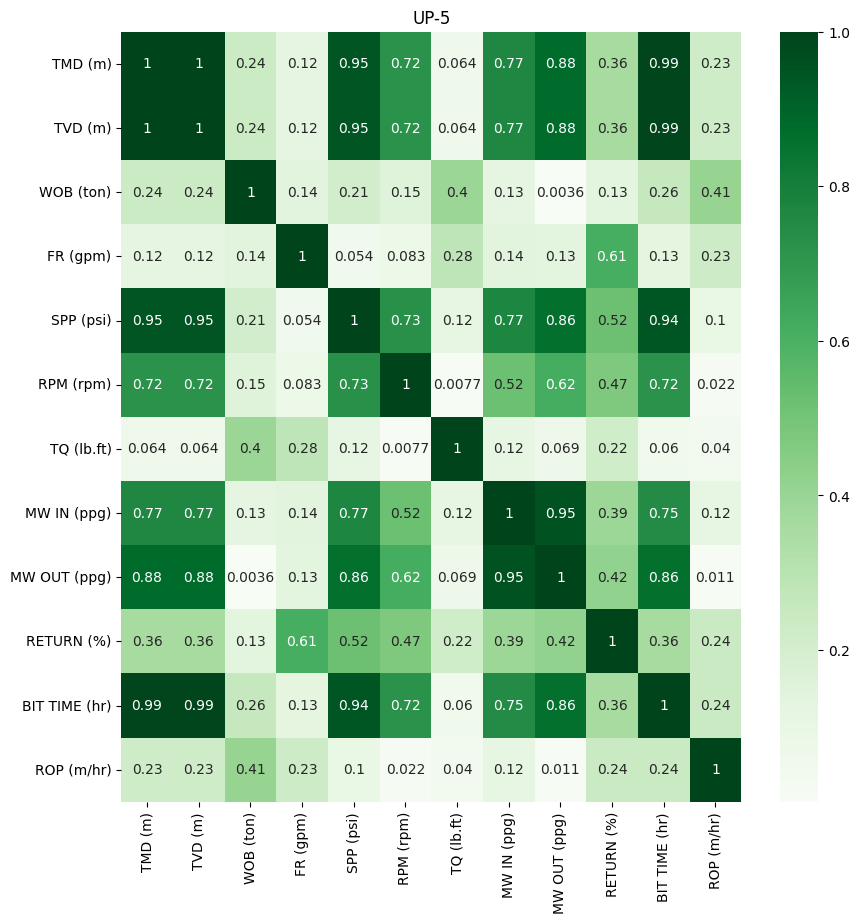

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr().abs(), annot=True, cmap='Greens').set(title='UP-5')

## Collinear Independent Variable Problems

In [7]:
df1=df1.drop(['DATE TIME', 'Formation'], axis=1,)
df1=df1.drop(['TMD (m)', 'MW OUT (ppg)','TQ (lb.ft)', 'BIT TIME (hr)','SPP (psi)','RETURN (%)', 'FR (gpm)'], axis=1)

In [8]:
df1.head()  

,TVD (m),WOB (ton),RPM (rpm),MW IN (ppg),ROP (m/hr)
0,428.01,3,70,10.4,33.3
1,429.01,4,79,10.4,39.3
2,430.00,3,79,10.4,26.7
3,430.99,5,82,10.4,29.1
4,432.00,10,92,10.4,40.8


[Text(0.5, 1.0, 'UP-5')]

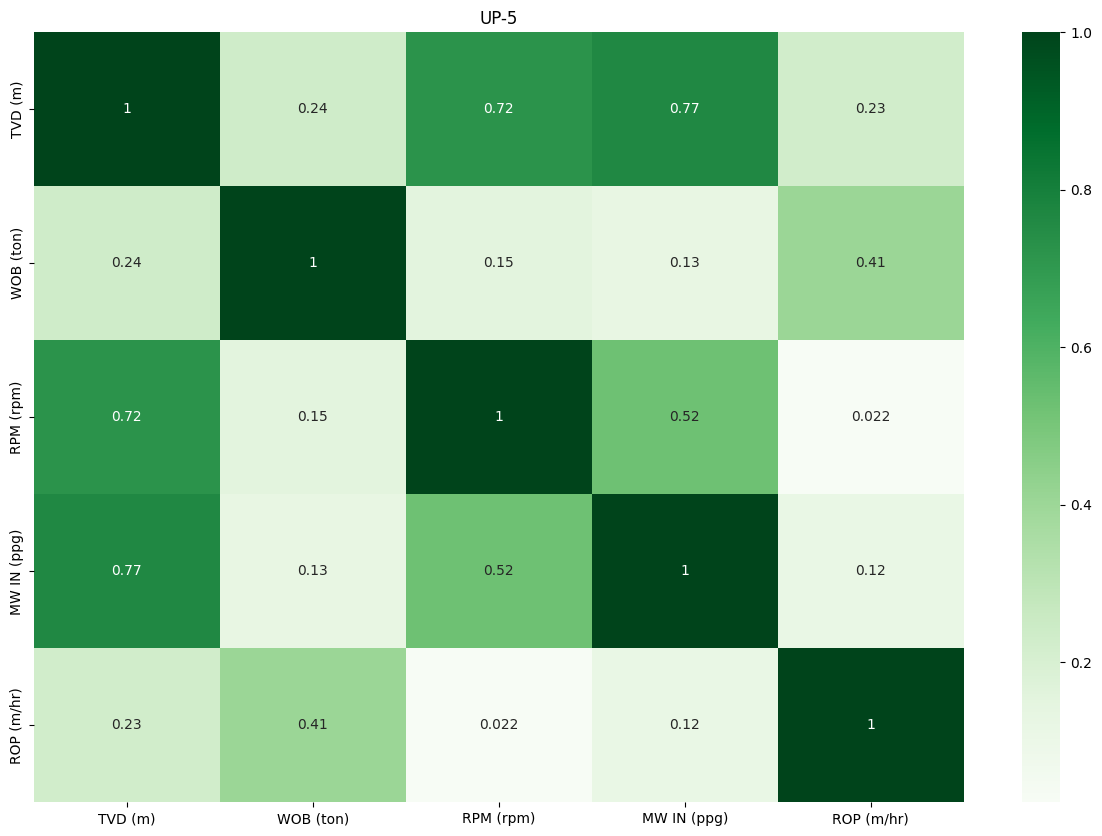

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr().abs(), annot=True, cmap='Greens').set(title='UP-5')

## Data Preprocessing

### Feature Matrix and Output Matrix

In [10]:
x = df1.drop(['ROP (m/hr)'], axis=1)
y = df1['ROP (m/hr)']

### Splitting Datasets into Training and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=0)

##Training the Multiple Linear Regression using Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.8325853726595878
0.9689123431524246


## Model Evaluation dan Inspection

In [14]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Validation Curve

In [15]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [16]:
param_range=np.arange(1,6)
param_name='max_depth'
train_scores, valid_scores = validation_curve(RandomForestRegressor(), x_train,
                                              y_train, param_name=param_name,
                                              param_range=param_range, cv=10)

In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

In [18]:
train_scores_min = train_scores_mean - train_scores_std
train_scores_max = train_scores_mean + train_scores_std

valid_scores_min = valid_scores_mean - valid_scores_std
valid_scores_max = valid_scores_mean + valid_scores_std

Text(0, 0.5, 'score')

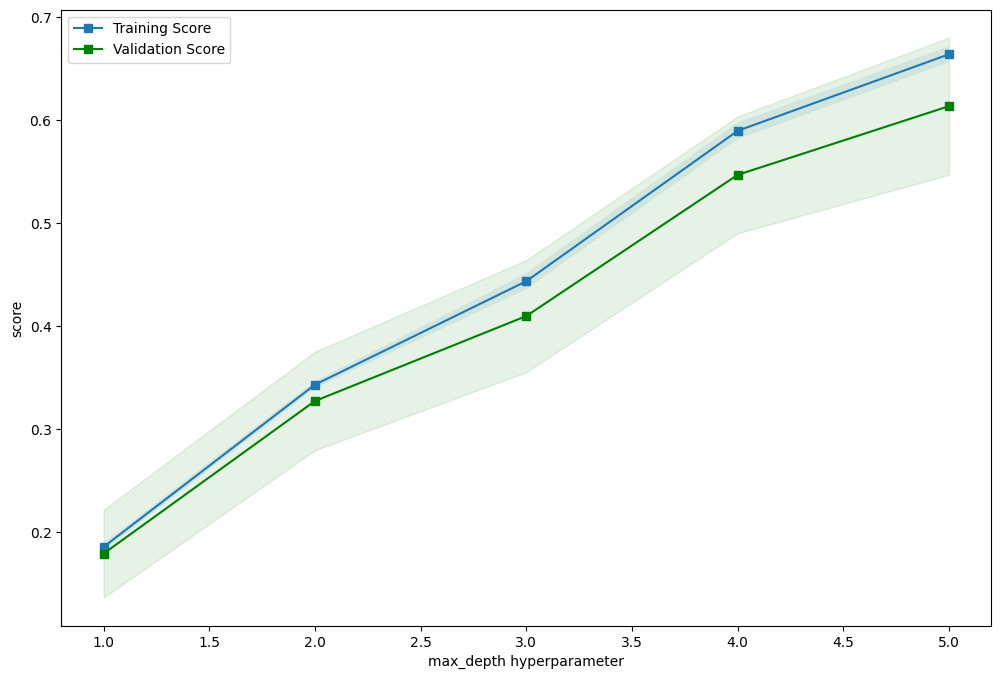

In [19]:
fig, axes = plt.subplots(1,1, figsize=(12,8))
axes.plot(param_range, train_scores_mean, 's-', label='Training Score')
axes.fill_between(param_range, train_scores_min, train_scores_max, alpha=0.1)

axes.plot(param_range, valid_scores_mean, 's-', label='Validation Score', color='g')
axes.fill_between(param_range, valid_scores_min, valid_scores_max, alpha=0.1, color='g')

axes.legend()
plt.xlabel(param_name + ' hyperparameter')
plt.ylabel('score')
#axes.set_xlabel

### Learning Curve

In [20]:
train_sizes = np.linspace(0.05,1,12)
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(RandomForestRegressor(), x_train,
                                                                  y_train, train_sizes=train_sizes, cv=10,
                                                                  return_times=True)

In [21]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0, 0.5, 'score')

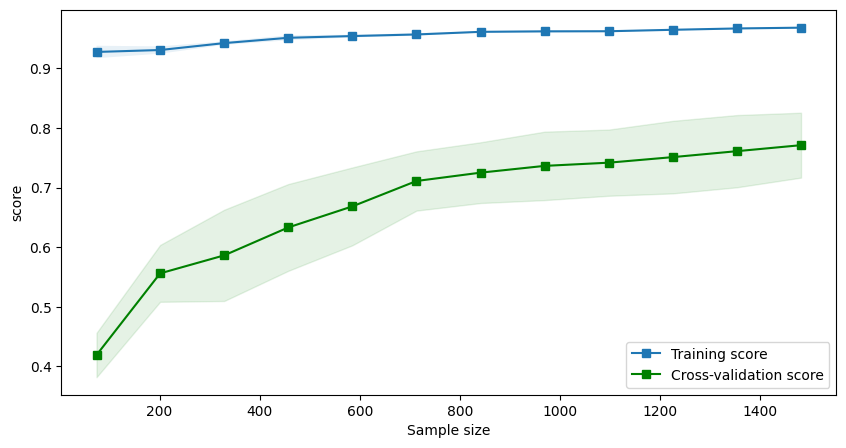

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, "s-", label="Training score")
axes.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1)
axes.plot(train_sizes, valid_scores_mean, "s-", color="g", label="Cross-validation score")
axes.fill_between(train_sizes,
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  alpha=0.1,
                  color="g")
axes.legend()
plt.xlabel('Sample size')
plt.ylabel('score')

### Grid Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distributions = {'n_estimators': sp_randint(50, 200),
                       'max_features': sp_randint(0, 10),
                       'max_depth': sp_randint(3, 20),}
print(param_distributions)
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', cv=10)

random_search.fit(x_train, y_train)

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x281e6f3a0>, 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x281e90d60>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x281e909d0>}


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x281e909d0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x281e90d60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x281e6f3a0>},
                   scoring='r2')

In [24]:
random_search.best_params_

{'max_depth': 14, 'max_features': 4, 'n_estimators': 97}

### Evaluation On Testing Set

In [25]:
model = random_search.best_estimator_

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

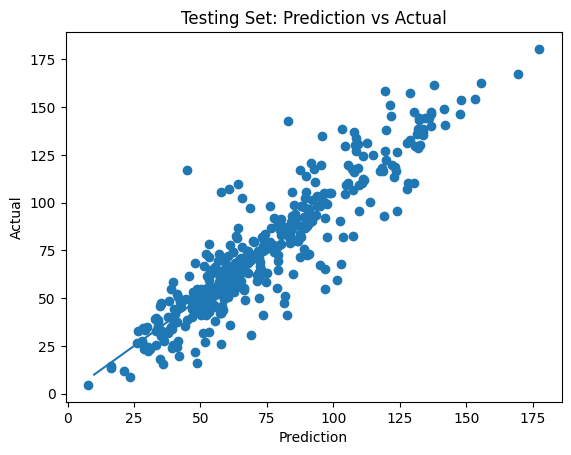

In [26]:
plt.scatter(y_pred_test, y_test)
plt.plot([10,80], [10,80])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Testing Set: Prediction vs Actual')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=True)
r2_test = r2_score(y_test, y_pred_test)

print('MAE\t', mae_test)
print('MSE\t', mse_test)
print('RMSE\t', rmse_test)
print('R2\t', r2_test)

MAE	 9.569873327953959
MSE	 13.927142642503373
RMSE	 193.96530218463585
R2	 0.8336750333163385


### Evaluation On Training Set

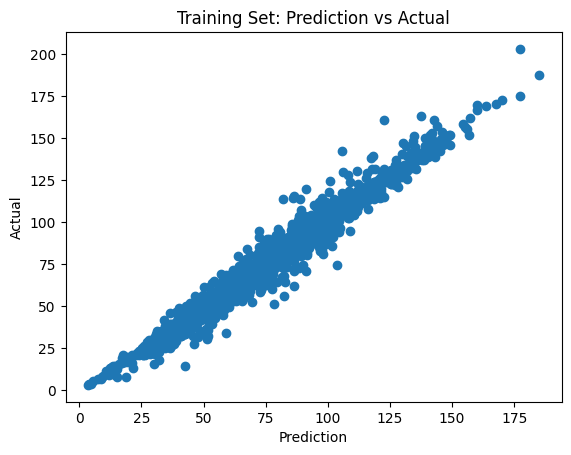

In [29]:
plt.scatter(y_pred_train, y_train)
plt.plot([10,80], [10,80])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Training Set: Prediction vs Actual')
plt.show()

In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score

mae_training = metrics.mean_absolute_error(y_train, y_pred_train)
mse_training = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
rmse_training = metrics.mean_squared_error(y_train, y_pred_train, squared=True)
r2_training = r2_score(y_train, y_pred_train)

print('MAE\t', mae_training)
print('MSE\t', mse_training)
print('RMSE\t', rmse_training)
print('R2\t', r2_training)

MAE	 4.328607528724723
MSE	 6.270407035495395
RMSE	 39.31800439079014
R2	 0.9621368582912408


## Model Inspection

### Permutation Feature Importance

In [31]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, 
                           x_test, 
                           y_test,
                           n_repeats=30)

In [32]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{x_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	1.132 +/- 0.080
WOB (ton)	0.332 +/- 0.038
RPM (rpm)	0.313 +/- 0.035
MW IN (ppg)	0.002 +/- 0.001


In [33]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([1.13179153, 0.33231192, 0.31299426, 0.00159603])

In [34]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([3, 2, 1, 0])

[Text(0, 0, 'MW IN (ppg)'),
 Text(0, 1, 'RPM (rpm)'),
 Text(0, 2, 'WOB (ton)'),
 Text(0, 3, 'TVD (m)')]

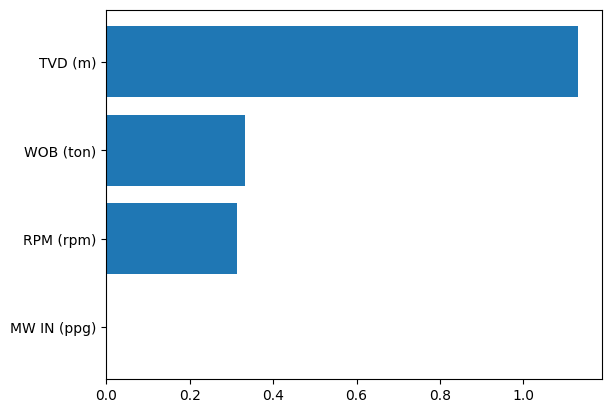

In [35]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(x_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(x.columns[sorted_idx])

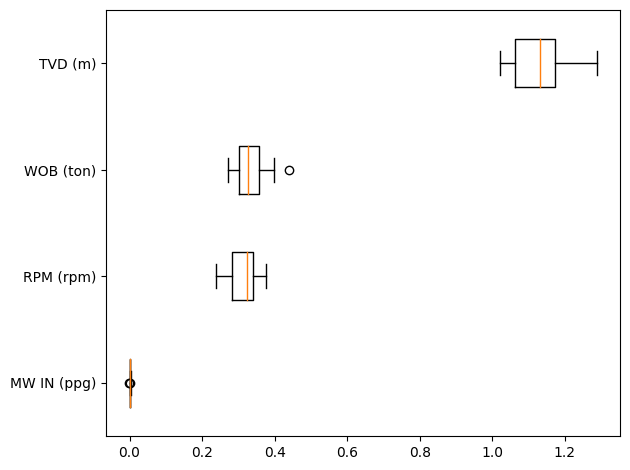

In [36]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

## Prediction Using the Model


In [37]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [38]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [39]:
output = model.predict(input)
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34.01359843])